1. Introduction:
News coverage of terrorist groups and attacks often dominate our airways. As we are constantly fed information on our the dire state of our world today. During our lifetime one of the most deadly attacks on U.S. soil happened on 9/11.  Forcing the hand of then President George W. Bush to declare a war on terro. Armed with the information I wanted to take a look at whether the war on terror was indeed successful. 

In [1]:
# Set up enviroment 
import math 
import pandas as pd 
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt 
import seaborn as sns

terror = pd.read_csv('terrorism.csv', encoding = "ISO-8859-1")

C:\Users\Kwasi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2. Hypothesis
Ho: There is no significiant differece between the average attacks per year pre war on terror and post war on terror. 

Ha: There is a significant difference between the average number of attacks pre war on terror and post war on terror. 

3. Data 
The data comes from the Global terrorist database collected by the University of Maryland. Terrorism is defined by them as "The threatened or actual use of illegal force and violence by a non-stat actor to attain political, economic, religious or a social goal through fear, coercion, or intimidation. 

In [2]:
#get to know the data a bit 
terror.info()
terror.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#The database is filled a whole host of columns that we may not need so after going through it I have to decide wittle down to a select few.
#Taking the columns that are needed and renaming them 
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [6]:
#Did the war on terror prove to be a success?
#Evaluating it based on the number of attacks before war on terror 
#Splitting our dataset 

pre_wot= terror[(terror.Year <=2001)]
pre_wot.head()
post_wot = terror[(terror.Year >=2002)]
post_wot.head()
pre_wot.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [15]:
# How large is each group?
print('pre war on terror sample size:', len(pre_wot))
print('post war on terror sample size:', len(post_wot))



pre war on terror sample size: 73556
post war on terror sample size: 108135


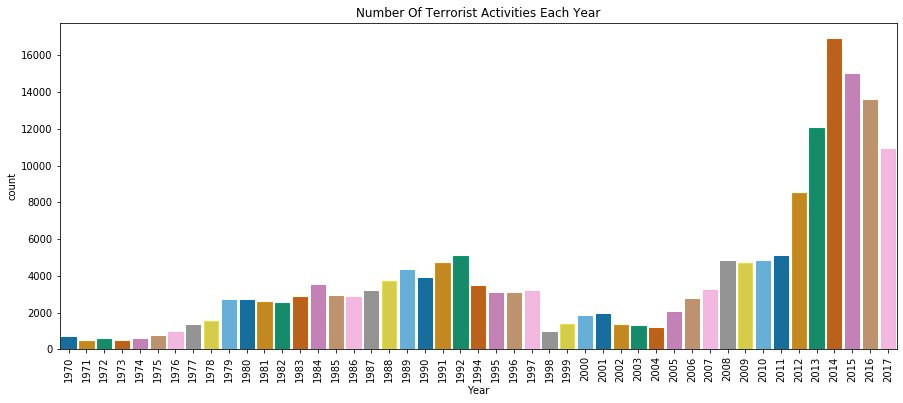

In [37]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='colorblind',edgecolor=sns.color_palette('colorblind',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

A quick look attacks over the years reveals a huge uptick after the year 2001. Now with statistically proofing we can define whether the war was indeed a succes or not. 

In [25]:
pre_wot.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
city               0
latitude        3784
longitude       3785
AttackType         0
Killed          6224
Wounded         8599
Target           470
Summary        66129
Group              0
Target_type        0
Weapon_type        0
Motive         66435
dtype: int64

In [26]:
post_wot.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
city             434
latitude         772
longitude        772
AttackType         0
Killed          4089
Wounded         7712
Target           166
Summary            0
Group              0
Target_type        0
Weapon_type        0
Motive         64695
dtype: int64

We can do a further drop of columns for our purposes of this experiment. Dropping the motive columns longitude,latitude,killed,and wounded columns. I will be dropping the last two because there is decent amount of null values and think that the attack number is a better measure of terrorist activity. 

In [34]:
post_wot=post_wot[['Year','Month','Day','Country','Region','AttackType','Target','Summary','Group','Target_type','Weapon_type']]
pre_wot=pre_wot[['Year','Month','Day','Country','Region','AttackType','Target','Summary','Group','Target_type','Weapon_type']]

In [35]:
post_wot.head(5)

,Year,Month,Day,Country,Region,AttackType,Target,Summary,Group,Target_type,Weapon_type
73556,2002,1,1,Pakistan,South Asia,Bombing/Explosion,"Pakistani civilians in a nightclub called, ""Ar...",01/01/2002: A car bomb exploded in the parking...,Unknown,Private Citizens & Property,Explosives
73557,2002,1,1,India,South Asia,Armed Assault,Mohammad Akbar Khan in Bandipora in Jammu and...,01/01/2002: Suspected Muslim militants entered...,Unknown,Private Citizens & Property,Firearms
73558,2002,1,1,India,South Asia,Armed Assault,"Indian Army Camp in Waripora Tangmarg, India",01/01/2002: An Indian army camp was attacked b...,Unknown,Military,Firearms
73559,2002,1,1,Indonesia,Southeast Asia,Bombing/Explosion,Indonesian Pentecostal Church in Palu,01/01/2002: A bomb exploded in Pentecost Churc...,Unknown,Religious Figures/Institutions,Explosives
73560,2002,1,1,Indonesia,Southeast Asia,Bombing/Explosion,"Indonesian Civilians and Bulungan, a fried chi...",01/01/2002: A grenade exploded outside of Bulu...,Unknown,Business,Explosives


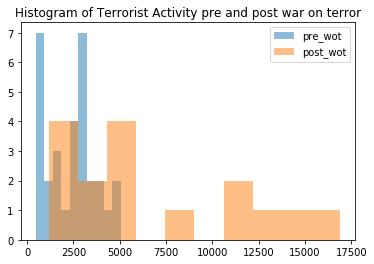

In [36]:
#plot our variables
#used grouping by year and month to provide a record for attack 
plt.hist(pre_wot.groupby('Year').count()['Month'], alpha=.5)
plt.hist(post_wot.groupby('Year').count()['Month'], alpha=.5)
plt.title('Histogram of Terrorist Activity pre and post war on terror')
plt.legend(['pre_wot','post_wot'])
plt.show()

In [12]:
#Running Kruskal Stat Test 
stats.kruskal(pre_wot.groupby('Year').count()['Month'],post_wot.groupby('Year').count()['Month'])

KruskalResult(statistic=9.599345326357604, pvalue=0.0019464675416411886)

In [14]:
#Checking Skewness and Kurtorsis of distribution 
print(stats.describe(pre_wot.groupby('Year').count()['Month']))
print(stats.describe(post_wot.groupby('Year').count()['Month']))

DescribeResult(nobs=31, minmax=(471, 5071), mean=2372.7741935483873, variance=1770180.0473118278, skewness=0.09212503013783685, kurtosis=-0.9826847223990454)
DescribeResult(nobs=16, minmax=(1166, 16903), mean=6758.4375, variance=28075493.8625, skewness=0.6467843817319769, kurtosis=-1.0066426339150953)


Text(0.5, 1.0, 'Terrorist Activity Pointplot')

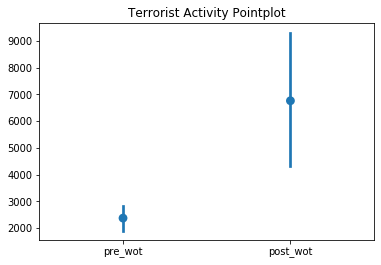

In [10]:
g = sns.pointplot(data=[pre_wot.groupby('Year').count()['Month'],
                        post_wot.groupby('Year').count()['Month']], join=False)
                        
g.set(xticklabels = ['pre_wot', 'post_wot'])
plt.title('Terrorist Activity Pointplot')

5.Results 
Based on my intial visual analysis, the terrorist attack datat was not normally distributed. So I chose to run a Kruskal statistics test. With a p=value of .002 and a t-stat of 9.59 we can reject our null hypothesis. 

6. Dicussion and Recommendation 
When evaluating the war on terror through the lens of average attack per year, there is no doubt that it has been a tremendous failure. But, its not so easy as pulling troops of the ground and completley different approach. There are still further things to explore within this huge dataset. Some other considerations would be to take at the manners in which terrorist attack. Breaking down by region to see if there are regions that overly account for terrorist activity. 

Plots such as below will be 

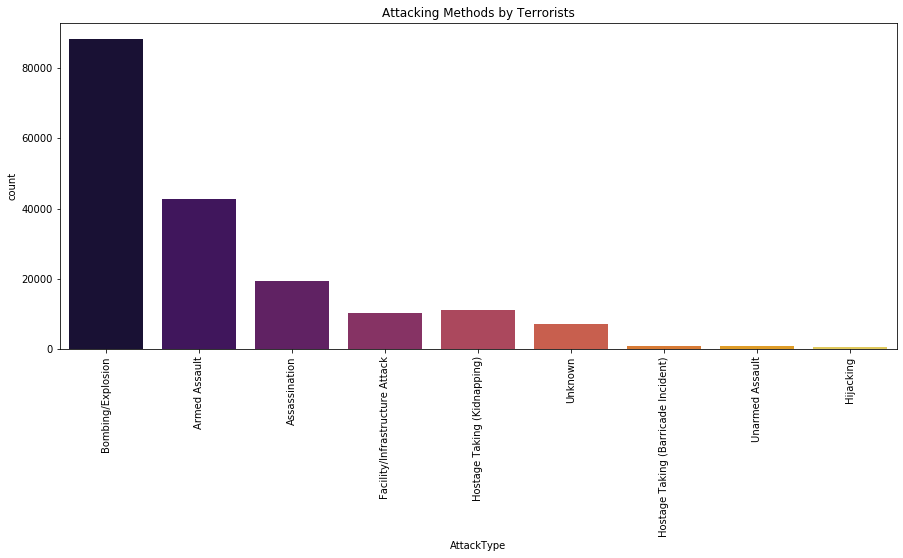

In [9]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=pre_wot['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()
